# Linear Regression 1

In [1]:
import torch
import torch.nn as nn
from torch.nn import Linear
import matplotlib.pyplot as plt
import numpy as np

## Create Dataset

Text(0.5, 0, 'x')

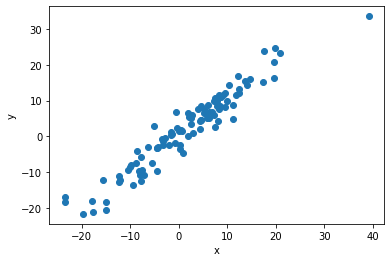

In [2]:
#generate normalized 100 x 1 tensor, mean = 0, var = 1
X = torch.randn(100, 1)
X = X * 10
#print(X)
#add noise in vertical direction
y = X + torch.randn(100, 1) * 3
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

## Create Linear Regression Model

In [3]:
#w = weight, b = bias
w = torch.tensor(3.0, requires_grad = True)
b = torch.tensor(1.0, requires_grad = True)

In [4]:
def forward(x):
    y = w*x + b
    return y

In [5]:
x = torch.tensor([[4], [7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

## Use torch.nn Built-in Linear Regression Model

In [6]:
torch.manual_seed(1)
#weight and bias are initialized with a random number
#one input, one output
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)
for name, param in model.named_parameters():
    if param.requires_grad:
        print ("name = ", name, ", value = ", param.data)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)
name =  weight , value =  tensor([[0.5153]])
name =  bias , value =  tensor([-0.4414])


In [7]:
x = torch.tensor([[2.0], [3.3]])
model(x)

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)

## Custom Modules

In [8]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        #inherit initializer from nn.Module
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [9]:
torch.manual_seed(1)
model = LR(1, 1)
for name, param in model.named_parameters():
    if param.requires_grad:
        print ("name = ", name, ", value = ", param.data)

name =  linear.weight , value =  tensor([[0.5153]])
name =  linear.bias , value =  tensor([-0.4414])


In [10]:
# x = torch.tensor([[1.0], [2.0]])
# model.forward(x)

In [11]:
[w, b] = model.parameters()
print(w, b)
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)
def get_params():
    return (w[0][0].item(), b[0].item())

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)
0.5152631998062134 -0.44137823581695557


In [12]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

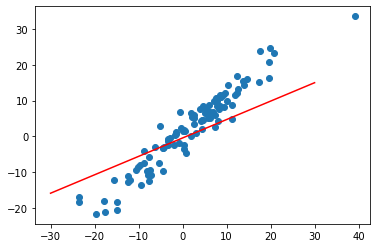

In [13]:
plot_fit('Initial Model')

## Define Loss Fuction

In [14]:
criterion = nn.MSELoss()
#stochastic gradient descent, use only part of dataset(in batches) to calculate loss
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001) #lr = learning rate, sued to time the f'(x)

In [15]:
#epochs: hyperparameter, times to train the model
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    #print("epoch:", i, "loss:", loss.item())
    #reset grad, otherwise grad will accumulate
    optimizer.zero_grad()
    #get grad of all parameters
    loss.backward()
    optimizer.step()
    

Text(0.5, 0, 'epoch')

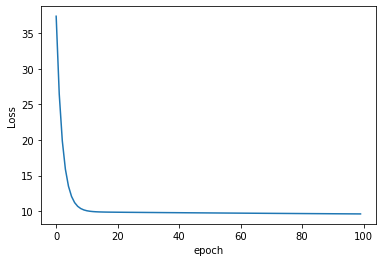

In [16]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

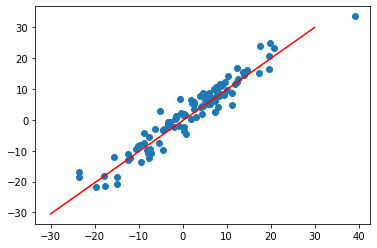

In [17]:
plot_fit("Trained Model")